In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Path folder utama yang berisi dataset dan folder output dataset baru
main_folder_path = 'D:\SEMESTER5\METOPEL\prediksi_kanker_paruparu\dataset'
output_folder_path = 'D:\SEMESTER5\METOPEL\prediksi_kanker_paruparu\dataset_new'

# Path dataset awal dan output
input_file_path = os.path.join(main_folder_path, 'cancer patient data sets.csv')
output_file_path = os.path.join(output_folder_path, 'cancer_patient_data_modified.csv')

In [3]:
# Load dataset
df = pd.read_csv(input_file_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Dataset ini memiliki 26 kolom dengan informasi sebagai berikut:

1. **Index**: Nomor indeks dari data pasien (skala nominal).
2. **Patient Id**: ID unik untuk tiap pasien (skala nominal).
3. **Age**: Usia pasien (skala rasio).
4. **Gender**: Jenis kelamin pasien (1 untuk laki-laki, 2 untuk perempuan - skala nominal).
5. **Air Pollution**: Tingkat paparan polusi udara (skala ordinal, kemungkinan 1-90).
6. **Alcohol use**: Tingkat konsumsi alkohol (skala ordinal, kemungkinan 1-90).
7. **Dust Allergy**: Tingkat alergi debu (skala ordinal, kemungkinan 1-90).
8. **Occupational Hazards**: Tingkat bahaya pekerjaan (skala ordinal, kemungkinan 1-9).
9. **Genetic Risk**: Tingkat risiko genetik untuk penyakit (skala ordinal, kemungkinan 1-9).
10. **Chronic Lung Disease**: Tingkat penyakit paru-paru kronis (skala ordinal, kemungkinan 1-9).
11. **Balanced Diet**: Tingkat kebiasaan diet seimbang (skala ordinal, kemungkinan 1-9).
12. **Obesity**: Tingkat obesitas (skala ordinal, kemungkinan 1-9).
13. **Smoking**: Tingkat merokok (skala ordinal, kemungkinan 1-9).
14. **Passive Smoker**: Tingkat paparan perokok pasif (skala ordinal, kemungkinan 1-9).
15. **Chest Pain**: Tingkat nyeri dada (skala ordinal, kemungkinan 1-9).
16. **Coughing of Blood**: Tingkat batuk berdarah (skala ordinal, kemungkinan 1-9).
17. **Fatigue**: Tingkat kelelahan (skala ordinal, kemungkinan 1-9).
18. **Weight Loss**: Tingkat penurunan berat badan (skala ordinal, kemungkinan 1-9).
19. **Shortness of Breath**: Tingkat sesak napas (skala ordinal, kemungkinan 1-9).
20. **Wheezing**: Tingkat mengi (skala ordinal, kemungkinan 1-9).
21. **Swallowing Difficulty**: Tingkat kesulitan menelan (skala ordinal, kemungkinan 1-9).
22. **Clubbing of Finger Nails**: Tingkat perubahan kuku jari (skala ordinal, kemungkinan 1-9).
23. **Frequent Cold**: Tingkat sering terkena pilek (skala ordinal, kemungkinan 1-9).
24. **Dry Cough**: Tingkat batuk kering (skala ordinal, kemungkinan 1-9).
25. **Snoring**: Tingkat mendengkur (skala ordinal, kemungkinan 1-9).
26. **Level**: Tingkat keparahan atau risiko pasien (kategorikal: "Low", "Medium", "High").


In [4]:
# Mapping level data (Low, Medium, High) ke nilai numerik
level_mapping = {'Low': float(0), 'Medium': float(1.0), 'High': float(2.0)}
df['Level'] = df['Level'].replace(level_mapping)

# Pastikan folder output sudah ada atau buat jika belum ada
os.makedirs(output_folder_path, exist_ok=True)

# Simpan kembali dataset yang telah dimodifikasi
df.to_csv(output_file_path, index=False)
print(f'Dataset berhasil disimpan di {output_file_path}')

Dataset berhasil disimpan di D:\SEMESTER5\METOPEL\prediksi_kanker_paruparu\dataset_new\cancer_patient_data_modified.csv


In [5]:
df = pd.read_csv(output_file_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0.0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1.0
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2.0
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2.0
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2.0


In [6]:
# cek apakah ada nilai yang hilang
df.isnull().sum()


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
# cek duplikasi data
df.duplicated().sum()

0

In [8]:
# Memisahkan fitur (X) dan target (y)
X = df.iloc[:, 2:-1].values  # Menggunakan semua kolom mulai dari indeks 2 sampai kolom terakhir kecuali Level
y = df.iloc[:, -1].values

In [9]:
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 70% training and 30% test


In [11]:
# Membuat model ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=23))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))


In [12]:
# Compile model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Training model dengan data latih dan validasi pada data uji
history = model.fit(
    X_train, 
    keras.utils.to_categorical(y_train, 3), 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, keras.utils.to_categorical(y_test, 3)), 
    verbose=2
)


Epoch 1/10
22/22 - 1s - loss: 0.6053 - accuracy: 0.5086 - val_loss: 0.5476 - val_accuracy: 0.7133 - 1s/epoch - 50ms/step
Epoch 2/10
22/22 - 0s - loss: 0.4855 - accuracy: 0.8400 - val_loss: 0.4285 - val_accuracy: 0.9167 - 90ms/epoch - 4ms/step
Epoch 3/10
22/22 - 0s - loss: 0.3649 - accuracy: 0.9371 - val_loss: 0.3077 - val_accuracy: 0.9367 - 100ms/epoch - 5ms/step
Epoch 4/10
22/22 - 0s - loss: 0.2621 - accuracy: 0.9514 - val_loss: 0.2240 - val_accuracy: 0.9467 - 102ms/epoch - 5ms/step
Epoch 5/10
22/22 - 0s - loss: 0.1917 - accuracy: 0.9500 - val_loss: 0.1686 - val_accuracy: 0.9467 - 91ms/epoch - 4ms/step
Epoch 6/10
22/22 - 0s - loss: 0.1432 - accuracy: 0.9586 - val_loss: 0.1313 - val_accuracy: 0.9533 - 84ms/epoch - 4ms/step
Epoch 7/10
22/22 - 0s - loss: 0.1103 - accuracy: 0.9629 - val_loss: 0.1049 - val_accuracy: 0.9533 - 87ms/epoch - 4ms/step
Epoch 8/10
22/22 - 0s - loss: 0.0879 - accuracy: 0.9629 - val_loss: 0.0861 - val_accuracy: 0.9633 - 90ms/epoch - 4ms/step
Epoch 9/10
22/22 - 0s -

10/10 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         Low       0.98      0.94      0.96        96
      Medium       1.00      0.97      0.98        92
        High       0.94      1.00      0.97       112

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



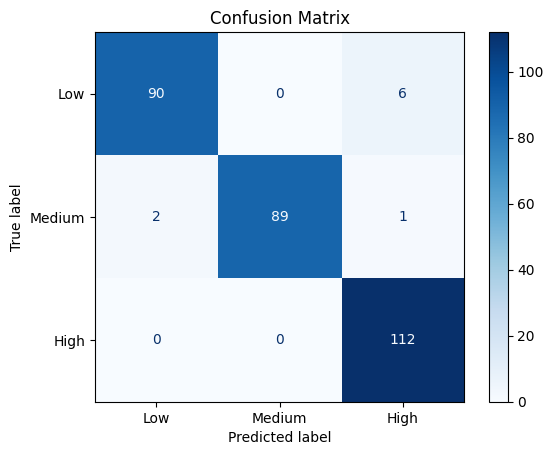

In [14]:
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi
y_test_classes = np.argmax(keras.utils.to_categorical(y_test, 3), axis=1) # Mengambil kelas sebenarnya

# Menampilkan akurasi, precision, recall, dan F1-score
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Low', 'Medium', 'High']))

# Hitung dan tampilkan confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, keras.utils.to_categorical(y_test, 3))
print('Test accuracy:', round(accuracy * 100, 2), '%')


10/10 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9700
Test accuracy: 97.0 %


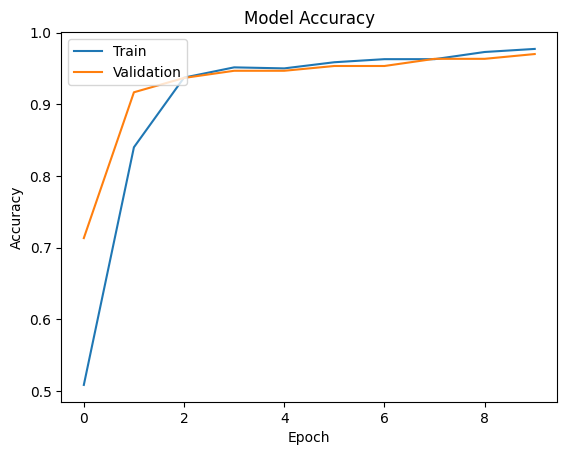

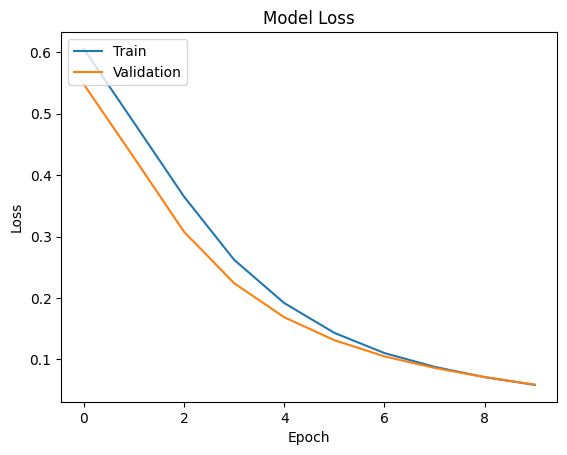

In [16]:
# Plot akurasi model selama training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss model selama training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Grafik di atas menunjukkan hasil pelatihan dan validasi model berdasarkan akurasi dan loss selama 10 epoch.

1. **Grafik Akurasi (Model Accuracy)**:
   - Pada awal pelatihan (epoch 0), akurasi model pada data training dan validation masih rendah, tetapi meningkat tajam pada epoch berikutnya.
   - Akurasi pada data validation lebih cepat mencapai nilai tinggi dibandingkan data training, menunjukkan bahwa model belajar dengan baik pada tahap awal.
   - Di akhir epoch (epoch 9 atau 10), akurasi untuk kedua set data hampir mencapai 1.0 (100%), menunjukkan bahwa model berhasil mempelajari pola dalam data dengan sangat baik.

2. **Grafik Loss (Model Loss)**:
   - Nilai loss pada data training dan validation menurun secara konsisten, menunjukkan bahwa model semakin baik dalam meminimalkan kesalahan prediksinya seiring berjalannya waktu.
   - Loss pada data validation sedikit lebih rendah daripada data training di sebagian besar epoch, yang menandakan performa baik tanpa tanda-tanda overfitting.

### Kesimpulan:
- Model menunjukkan peningkatan akurasi dan penurunan loss yang stabil, yang merupakan tanda pelatihan yang baik.
- Tidak ada indikasi overfitting, karena performa pada data training dan validation tetap sejalan hingga akhir pelatihan.
- Model ini tampaknya mampu generalisasi dengan baik pada data yang belum pernah dilihat (validation set).

In [17]:
# Path folder output untuk model dan scaler
output_folder_model = 'D:\SEMESTER5\METOPEL\prediksi_kanker_paruparu\model'

# Pastikan folder output sudah ada atau buat jika belum ada
os.makedirs(output_folder_model, exist_ok=True)

# Save the model
model_path = os.path.join(output_folder_model, 'my_model.h5')
model.save(model_path)
print(f'Model berhasil disimpan di {model_path}')

# Save the scaler object to a file
scaler_path = os.path.join(output_folder_model, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f'Scaler berhasil disimpan di {scaler_path}')


Model berhasil disimpan di D:\SEMESTER5\METOPEL\prediksi_kanker_paruparu\model\my_model.h5
Scaler berhasil disimpan di D:\SEMESTER5\METOPEL\prediksi_kanker_paruparu\model\scaler.pkl
